<a href="https://colab.research.google.com/github/cruzmarcela02/ciencia-de-datos/blob/main/TP1-aerolineas/colab-analisis/horario_duracion_pasajeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### CARGA ARCHIVO

In [ ]:
# Cargamos archivos:
# 1. https://drive.google.com/file/d/1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ/view?usp=drive_link
id='1ZJIc1Y_0G4hdx_0GkTrw10IYrlAE4SoQ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('filtered_customer_booking.csv')

In [ ]:
 # 2. https://drive.google.com/file/d/1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY/view?usp=drive_link
id='1XGEH-SRn9wde2vZC5lHtYjYNKSPtxsiY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('customer_airways_data.csv')

In [ ]:
# 3. https://drive.google.com/file/d/132CgYVqb-uygkp8wM80ur_cghtUDaEI7/view?usp=sharing
id='132CgYVqb-uygkp8wM80ur_cghtUDaEI7'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('cleaned-reviews.csv')

In [ ]:
# 4. https://drive.google.com/file/d/14GjEtEbD2al063LU0thzp-jRhuJKgvql/view?usp=drive_link
id='14GjEtEbD2al063LU0thzp-jRhuJKgvql'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('airline_data.csv')

# **Abrimos los DataFrame**

In [ ]:
archivo_uno = pd.read_csv('filtered_customer_booking.csv')
archivo_uno

,Unnamed: 0,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_dos = pd.read_csv("customer_airways_data.csv", encoding='iso-8859-1')
archivo_dos

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_tres = pd.read_csv('cleaned-reviews.csv')
archivo_tres

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...,...
3406,3413,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,3414,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


In [ ]:
archivo_cuatro = pd.read_csv('airline_data.csv')
archivo_cuatro

,Unnamed: 0,reviews,rates,date,country
0,0,✅ Trip Verified | Excellent service both on th...,5.00,24th January 2023,United Kingdom
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9.00,24th January 2023,United Kingdom
2,2,✅ Trip Verified | A really excellent journey....,9.00,23rd January 2023,United Kingdom
3,3,✅ Trip Verified | This flight was one of the ...,9.00,21st January 2023,United Kingdom
4,4,Not Verified | It seems that there is a race t...,2.00,19th January 2023,United States
...,...,...,...,...,...
3413,3413,Flew British Airways from Sydney to Venice on ...,6.00,20th May 2014,Australia
3414,3414,Recently for our honeymoon we took advantage o...,10.00,19th May 2014,United Kingdom
3415,3415,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,1.00,18th May 2014,United Kingdom
3416,3416,LHR-JTR-LHR. A tale of opposites for BA's new ...,4.00,18th May 2014,United Kingdom


# **LIMPIEZA: archivo_dos**

In [ ]:
archivo_dos.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
archivo_dos.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
archivo_dos.purchase_lead.unique()

array([262, 112, 243,  96,  68,   3, 201, 238,  80, 378, 185,   8, 265,
       245, 192, 259,  19,  67, 351, 228,  21,  23,  25,  16,  66,  51,
        37, 101,   7,   5,  33,  20,  56,  13,  71, 346,   9,  65, 221,
       107,  14,  77,  24,  47,  22,  11,  35, 272, 250, 161, 128, 190,
       311,  27, 314, 102,   2,  26,  32,  57, 198, 120,  69, 281, 282,
        15,  31, 316, 232, 156, 196, 283,  34,  63,   6, 227, 181, 138,
       134,  85,  93, 118,  90, 168, 127,  18, 153, 186, 263, 172, 230,
        42,  81, 140, 285, 179, 341, 173, 180, 366, 229, 174,  82,  75,
       163, 105, 276, 110,  83, 154,  55,  45,  54, 193,  10, 166,  97,
       239, 182,  99,  53,  28, 384,  70, 126, 142,  87,  86, 313,  41,
        91, 206, 197, 268, 157, 145, 241, 139,  59, 396, 280,  79, 380,
       132, 121, 419,  58, 115, 236, 225, 116, 191, 275, 417, 159,  92,
       106, 218, 295,  12, 305, 235, 332, 125, 204, 310, 368, 169, 214,
       155, 325, 130, 189, 226, 122,  88, 211, 188, 129, 149,  3

In [ ]:
archivo_dos.length_of_stay.unique()

array([ 19,  20,  22,  31,  48,  33,  30,  25,  43,  24,  17,  34,  18,
        37,  29, 155,  88,  27,  21,  28,  47,  35,  82,  26,  90,  23,
        84,  61,  40,  96,  69,  89,  58,  56, 110, 165, 111,  38, 207,
        91,   1, 274,  44,  57, 106,  68,  87,  51, 196,  77,  41, 278,
       108, 180,  72,  32,  62,  45,  50,  59, 125, 124,  46,  55,  60,
        36,  65, 208, 204,  83,  42,  85,  64,  86,  54, 238, 275,  39,
        95,  70,  93,  49, 107, 121, 203, 188,  78, 209, 126,  80, 200,
       255,  63,  92, 118,  79, 181,  76,  94, 305, 149, 177, 183, 162,
        71, 109,  52, 140,  66, 184, 152,  53, 291, 329,  75, 130, 142,
       175,  73, 304, 186, 116, 101, 223, 415, 312, 143,  81, 144, 134,
       135, 117, 120, 138, 153,  74, 261, 103, 104, 112, 157, 266,  98,
       318,  67, 273, 105, 148, 102, 119, 122, 603, 465, 409, 128, 233,
        99, 113, 147, 127,  97, 170, 156, 160, 182, 115, 158,   0, 357,
       173, 228, 205, 178, 123, 352, 141, 139, 129, 301, 176, 33

In [ ]:
archivo_dos.flight_hour.unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10,  8, 23,  9, 13, 11,
        0,  1,  5, 16, 18, 22, 21])

In [ ]:
archivo_dos.flight_day.unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
archivo_dos.route.unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
archivo_dos.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
archivo_dos.wants_extra_baggage.unique()

array([1, 0])

In [ ]:
archivo_dos.wants_preferred_seat.unique()

array([0, 1])

In [ ]:
archivo_dos.wants_in_flight_meals.unique()

array([0, 1])

In [ ]:
archivo_dos.flight_duration.unique()

array([5.52, 5.07, 7.57, 6.62, 7.  , 4.75, 8.83, 7.42, 6.42, 5.33, 4.67,
       5.62, 8.58, 8.67, 4.72, 8.15, 6.33, 5.  , 4.83, 9.5 , 5.13])

In [ ]:
archivo_dos.booking_complete.unique()

array([0, 1])

In [ ]:
archivo_dos_limpio = archivo_dos.loc[archivo_dos.booking_origin != '(not set)']
archivo_dos_limpio

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## ***A mayor horas de duración del viaje (vuelos largos), la gente suele viajar a la noche.***

In [ ]:
archivo_dos_limpio.length_of_stay.unique() #eliminamos los de duracion del dia

array([ 19,  20,  22,  31,  48,  33,  30,  25,  43,  24,  17,  34,  18,
        37,  29, 155,  88,  27,  21,  28,  47,  35,  82,  26,  90,  23,
        84,  61,  40,  96,  69,  89,  58,  56, 110, 165, 111,  38, 207,
        91,   1, 274,  44,  57, 106,  68,  87,  51, 196,  77,  41, 278,
       108, 180,  72,  32,  62,  45,  50,  59, 125, 124,  46,  55,  60,
        36,  65, 208, 204,  83,  42,  85,  64,  86,  54, 238, 275,  39,
        95,  70,  93,  49, 107, 121, 203, 188,  78, 209, 126,  80, 200,
       255,  63,  92, 118,  79, 181,  76,  94, 305, 149, 177, 183, 162,
        71, 109,  52, 140,  66, 184, 152,  53, 291, 329,  75, 130, 142,
       175,  73, 304, 186, 116, 101, 223, 415, 312, 143,  81, 144, 134,
       135, 117, 120, 138, 153,  74, 261, 103, 104, 112, 157, 266,  98,
       318,  67, 273, 105, 148, 102, 119, 122, 603, 465, 409, 128, 233,
        99, 113, 147, 127,  97, 170, 156, 160, 182, 115, 158,   0, 357,
       173, 228, 205, 178, 123, 352, 141, 139, 129, 301, 176, 33

In [ ]:
realizados = archivo_dos_limpio[archivo_dos_limpio.booking_complete != 0] # vuelos realizados
realizados

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,Internet,RoundTrip,33,6,6,Wed,PENTPE,Taiwan,1,1,0,4.67,1
49977,2,Internet,RoundTrip,15,6,16,Tue,PENTPE,Malaysia,1,1,1,4.67,1
49980,4,Internet,RoundTrip,242,6,9,Tue,PENXIY,Malaysia,1,0,1,5.00,1
49984,2,Internet,RoundTrip,7,6,4,Wed,PERPNH,Australia,0,0,0,5.62,1


In [ ]:
planeados = archivo_dos_limpio[archivo_dos_limpio.booking_complete == 0]
planeados

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
archivo_dos_limpio.flight_duration.value_counts().sort_index()

flight_duration
4.67     2740
4.72      499
4.75     1254
4.83      155
5.00      240
5.07      507
5.13      125
5.33     1537
5.52      667
5.62     5515
6.33     1190
6.42     1730
6.62     4716
7.00     3372
7.42      223
7.57     2833
8.15      307
8.58     6961
8.67      807
8.83    14501
9.50       37
Name: count, dtype: int64

In [ ]:
archivo_dos.flight_duration.describe()

count              50,000.00
mean                    7.28
std                     1.50
min                     4.67
25%                     5.62
50%                     7.57
75%                     8.83
max                     9.50
Name: flight_duration, dtype: float64

In [ ]:
#archivo_dos_limpio.loc[archivo_dos.flight_duration <= 5.62]

In [ ]:
# archivo_dos.loc[(archivo_dos.flight_duration > 5.62) & (archivo_dos.flight_duration <= 7.57)]

In [ ]:
minima_duracion = archivo_dos.flight_duration.min()
minima_duracion

4.67

In [ ]:
maxima_duracion = archivo_dos.flight_duration.max()
maxima_duracion

9.5

In [ ]:
hora_duracion_vuelo = archivo_dos_limpio[['num_passengers', 'flight_hour', 'flight_duration']]
hora_duracion_vuelo

,num_passengers,flight_hour,flight_duration
0,2,7,5.52
1,1,3,5.52
2,2,17,5.52
3,1,4,5.52
4,2,15,5.52
...,...,...,...
49995,2,9,5.62
49996,1,4,5.62
49997,1,22,5.62
49998,1,11,5.62


In [ ]:
hora_duracion_vuelo.corr()

,num_passengers,flight_hour,flight_duration
num_passengers,1.00,0.02,-0.06
flight_hour,0.02,1.00,-0.00
flight_duration,-0.06,-0.00,1.00


In [ ]:
# Definimos funcion para separar el tipo de duracion de vuelo
def vuelo(duracion):
  if duracion < 6:
    return 'Corto'
  if duracion < 8:
    return 'Normal'
  return 'Largo'

In [ ]:
hora_duracion_vuelo['duracion'] = hora_duracion_vuelo['flight_duration'].map(vuelo)
hora_duracion_vuelo

,num_passengers,flight_hour,flight_duration,duracion
0,2,7,5.52,Corto
1,1,3,5.52,Corto
2,2,17,5.52,Corto
3,1,4,5.52,Corto
4,2,15,5.52,Corto
...,...,...,...,...
49995,2,9,5.62,Corto
49996,1,4,5.62,Corto
49997,1,22,5.62,Corto
49998,1,11,5.62,Corto


In [ ]:
# Definimos funcion para separar la hora de vuelo en:
def frecuencia_horaria (hora):
  if (hora >= 5) and (hora <= 12):
    return 'Temprano'
  if (hora >= 13) and (hora <= 20):
    return 'Tarde'
  return 'Noche'

In [ ]:
hora_duracion_vuelo['frecuencia_horaria'] = hora_duracion_vuelo['flight_hour'].map(frecuencia_horaria)
hora_duracion_vuelo

,num_passengers,flight_hour,flight_duration,duracion,frecuencia_horaria
0,2,7,5.52,Corto,Temprano
1,1,3,5.52,Corto,Noche
2,2,17,5.52,Corto,Tarde
3,1,4,5.52,Corto,Noche
4,2,15,5.52,Corto,Tarde
...,...,...,...,...,...
49995,2,9,5.62,Corto,Temprano
49996,1,4,5.62,Corto,Noche
49997,1,22,5.62,Corto,Noche
49998,1,11,5.62,Corto,Temprano


In [ ]:
hora_duracion_pasajeros = hora_duracion_vuelo.groupby(['duracion', 'frecuencia_horaria'])['num_passengers'].sum().to_frame().reset_index()

In [ ]:
hora_duracion_pasajeros = hora_duracion_pasajeros.rename(columns={'num_passengers': 'total_pasajeros'})
hora_duracion_pasajeros

,duracion,frecuencia_horaria,total_pasajeros
0,Corto,Noche,5351
1,Corto,Tarde,5734
2,Corto,Temprano,10152
3,Largo,Noche,10063
4,Largo,Tarde,6153
5,Largo,Temprano,17673
6,Normal,Noche,5940
7,Normal,Tarde,7071
8,Normal,Temprano,11274


In [ ]:
pasajeros_pivot = hora_duracion_pasajeros.pivot(values='total_pasajeros', columns='duracion',index='frecuencia_horaria')

In [ ]:
pasajeros_pivot

duracion,Corto,Largo,Normal
frecuencia_horaria,,,
Noche,5351,10063,5940
Tarde,5734,6153,7071
Temprano,10152,17673,11274


In [ ]:
nuevo_orden_columnas = ['Corto', 'Normal', 'Largo']

In [ ]:
pasajeros_pivot_ordenado = pasajeros_pivot.reindex(columns=nuevo_orden_columnas)
pasajeros_pivot_ordenado

duracion,Corto,Normal,Largo
frecuencia_horaria,,,
Noche,5351,5940,10063
Tarde,5734,7071,6153
Temprano,10152,11274,17673


Text(0.0, 1.0, 'Cantidad de Pasajeros por Horarios y Duración')

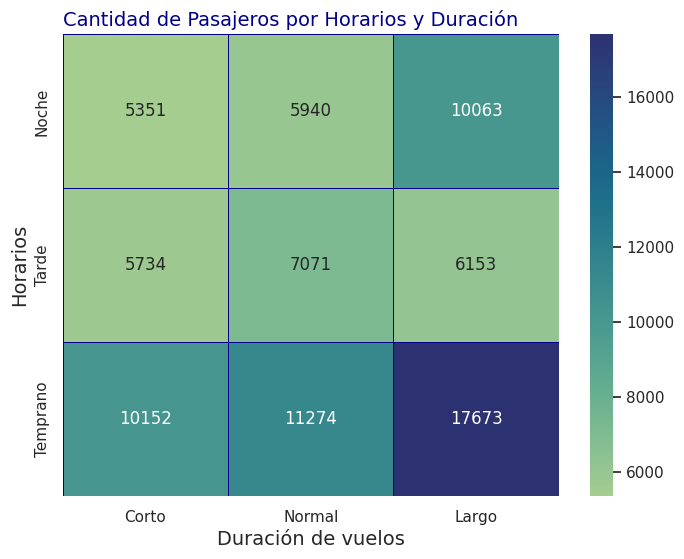

In [ ]:
plt.figure(figsize=(8,6))
s=sns.heatmap(pasajeros_pivot_ordenado, linewidth=0.5, linecolor='darkblue', annot=True, cmap='crest', fmt='g')
s.set_xlabel('Duración de vuelos', fontsize=14)
s.set_ylabel('Horarios', fontsize=14)
plt.title('Cantidad de Pasajeros por Horarios y Duración', loc='left', color='darkblue', size=14)

In [ ]:
pasajeros_pivot_ordenado[[True, False, False]]

duracion,Corto,Normal,Largo
frecuencia_horaria,,,
Noche,5351,5940,10063


In [ ]:
vuelos_noche = hora_duracion_pasajeros.loc[hora_duracion_pasajeros.frecuencia_horaria == 'Noche']
vuelos_noche

,duracion,frecuencia_horaria,total_pasajeros
0,Corto,Noche,5351
3,Largo,Noche,10063
6,Normal,Noche,5940


In [ ]:
vuelos_noche.sort_values(by= 'total_pasajeros', inplace = True)
vuelos_noche

,duracion,frecuencia_horaria,total_pasajeros
0,Corto,Noche,5351
6,Normal,Noche,5940
3,Largo,Noche,10063


In [ ]:
vuelos_noche['porcentaje'] = (vuelos_noche.total_pasajeros / vuelos_noche.total_pasajeros.sum()) * 100

In [ ]:
vuelos_noche

,duracion,frecuencia_horaria,total_pasajeros,porcentaje
0,Corto,Noche,5351,25.06
6,Normal,Noche,5940,27.82
3,Largo,Noche,10063,47.12


Text(0.0, 1.0, 'Distribución de pasajeros de vuelos nocturnos')

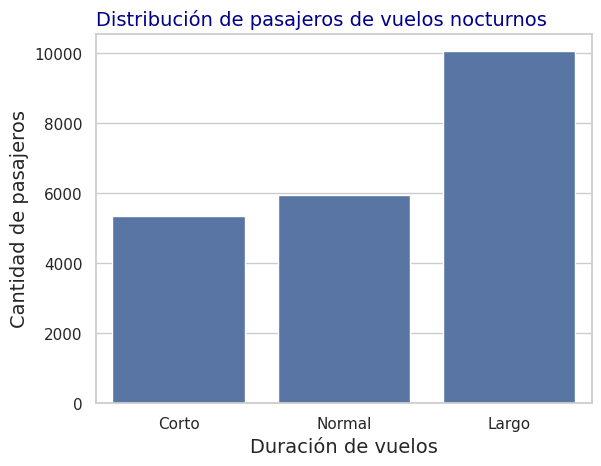

In [ ]:
sns_noche = sns.barplot(vuelos_noche, x="duracion", y="total_pasajeros", errorbar=None)
sns_noche.set_xlabel('Duración de vuelos', fontsize=14)
sns_noche.set_ylabel('Cantidad de pasajeros', fontsize=14)
plt.title('Distribución de pasajeros de vuelos nocturnos', loc='left', color='darkblue', size=14)

In [ ]:
vuelos_largos = hora_duracion_pasajeros.loc[hora_duracion_pasajeros.duracion == 'Largo']
vuelos_largos

,duracion,frecuencia_horaria,total_pasajeros
3,Largo,Noche,10063
4,Largo,Tarde,6153
5,Largo,Temprano,17673


In [ ]:
# Definimon orden categórico
orden_categorico = ['Temprano', 'Tarde', 'Noche']

# Convertimos la columna 'frecuencia_horaria' a tipo categórico con el orden
vuelos_largos['frecuencia_horaria'] = pd.Categorical(vuelos_largos['frecuencia_horaria'], categories= orden_categorico, ordered=True)

# Ordenamos
vuelos_largos = vuelos_largos.sort_values(by='frecuencia_horaria')
vuelos_largos

,duracion,frecuencia_horaria,total_pasajeros
5,Largo,Temprano,17673
4,Largo,Tarde,6153
3,Largo,Noche,10063


In [ ]:
vuelos_largos['porcentaje'] = (vuelos_largos.total_pasajeros / vuelos_largos.total_pasajeros.sum()) * 100

In [ ]:
vuelos_largos

,duracion,frecuencia_horaria,total_pasajeros,porcentaje
5,Largo,Temprano,17673,52.15
4,Largo,Tarde,6153,18.16
3,Largo,Noche,10063,29.69


Text(0.0, 1.0, 'Distribución de pasajeros en distintos horarios')

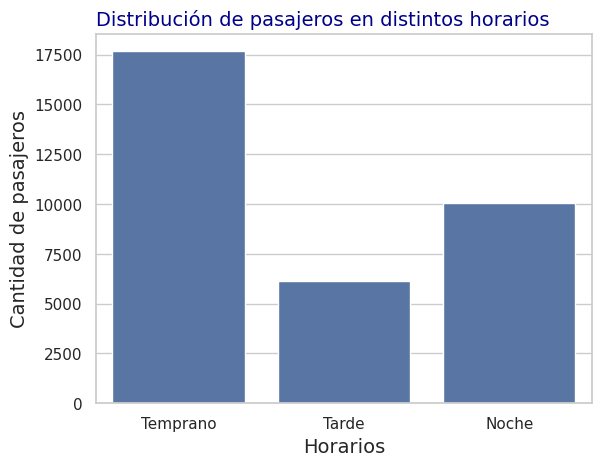

In [ ]:
sns_frecuencia_horaria = sns.barplot(vuelos_largos, x="frecuencia_horaria", y="total_pasajeros", errorbar=None)
sns_frecuencia_horaria.set_xlabel('Horarios', fontsize=14)
sns_frecuencia_horaria.set_ylabel('Cantidad de pasajeros', fontsize=14)
plt.title('Distribución de pasajeros en distintos horarios', loc='left', color='darkblue', size=14)